In [1]:
!qstat -u medirz90


o0029.ten.osc.edu:
                                                                               Req'd  Req'd   Elap 
Job id               Username Queue    Name                 SessID NDS   TSK   Memory Time Use S Time 
-------------------- -------- -------- -------------------- ------ ----- ----- ------ ----- - -----
26131625             medirz90 serial   ondemand/sys/dashboa --         1    10     -- 01:00 R 00:16


In [2]:
%matplotlib inline

In [3]:
import fitsio as ft
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [4]:
def read(filename, bits):
    d_ = ft.read(filename, lower=True)
    return cutphotmask(d_, bits)

def cutphotmask(aa, bits):
    print(f'{len(aa)} before imaging veto')
    
    keep = (aa['nobs_g']>0) & (aa['nobs_r']>0) & (aa['nobs_z']>0)
    for biti in bits:
        keep &= ((aa['lrg_maskbits'].astype('int') & 2**biti)==0)
    print(f'{keep.sum()} {keep.mean()} after imaging veto')
    return aa[keep]

def hist(d, r, key='ebv'):
    
    ebv_m, ebv_ed, _ = binned_statistic(r[key], r[key], range=(0., 0.08))
    nr, __, __ = binned_statistic(r[key], np.ones(r.size)*1., statistic='sum', bins=ebv_ed)
    nd, __, __ = binned_statistic(d[key], np.ones(d.size)*1., statistic='sum', bins=ebv_ed)

    sf = nd.sum()/nr.sum()
    
    return ebv_m, nd/(nr*sf)

In [5]:
bits = [1, 8, 9, 11, 12, 13]
d = read('/fs/ess/PHS0336/data/rongpu/LRGsv3_north.fits', bits)
r = read('/fs/ess/PHS0336/data/rongpu/random_north.fits', bits)

3756716 before imaging veto
3639331 0.9687532941004856 after imaging veto
11377115 before imaging veto
10296217 0.904993664914172 after imaging veto


In [6]:
ebv_all, r_all = hist(d, r)
ebv_m, r_m = hist(d[d['lrg_murdur']==True], r)
ebv_s, r_s = hist(d[d['lrg_sfd']==True], r)

ebvm_all, rm_all = hist(d, r, 'ebv_murdur')
ebvm_m, rm_m = hist(d[d['lrg_murdur']==True], r, 'ebv_murdur')
ebvm_s, rm_s = hist(d[d['lrg_sfd']==True], r, 'ebv_murdur')

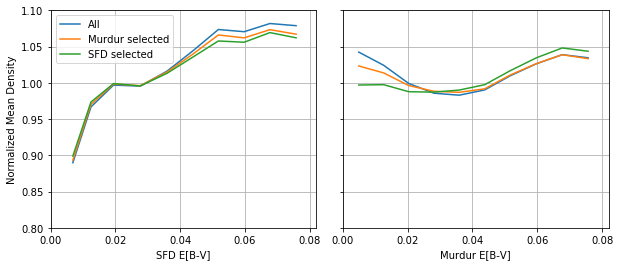

In [10]:
fg, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)
fg.subplots_adjust(wspace=0.1)

ax[0].plot(ebv_all, r_all, label='All')
ax[0].plot(ebv_m, r_m, label='Murdur selected')
ax[0].plot(ebv_s, r_s, label='SFD selected')

ax[1].plot(ebvm_all, rm_all, label='All')
ax[1].plot(ebvm_m, rm_m, label='Murdur selected')
ax[1].plot(ebvm_s, rm_s, label='SFD selected')

ax[0].legend()
ax[0].set(xlabel='SFD E[B-V]', ylabel='Normalized Mean Density', 
          xlim=(0.0, 0.082), ylim=(0.8, 1.1))
ax[1].set(xlabel='Murdur E[B-V]')
for a in ax:a.grid(True)

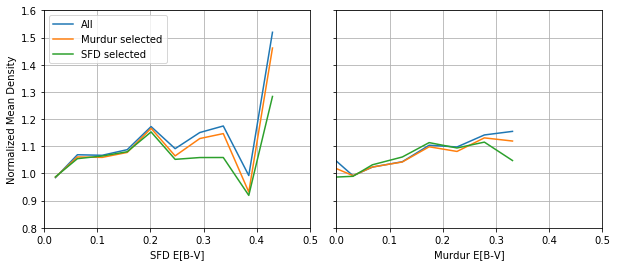

In [6]:
fg, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)
fg.subplots_adjust(wspace=0.1)

ax[0].plot(ebv_all, r_all, label='All')
ax[0].plot(ebv_m, r_m, label='Murdur selected')
ax[0].plot(ebv_s, r_s, label='SFD selected')

ax[1].plot(ebvm_all, rm_all, label='All')
ax[1].plot(ebvm_m, rm_m, label='Murdur selected')
ax[1].plot(ebvm_s, rm_s, label='SFD selected')

ax[0].legend()
ax[0].set(xlabel='SFD E[B-V]', ylabel='Normalized Mean Density', 
          xlim=(0.0, 0.5), ylim=(0.8, 1.6))
ax[1].set(xlabel='Murdur E[B-V]')
for a in ax:a.grid(True)

In [6]:
import sys
sys.path.insert(0, '/users/PHS0336/medirz90/github/LSSutils')
from lssutils import utils as ut
from lssutils.stats.cl import get_cl

In [7]:
hds = ut.hpixsum(256, d['ra'][d['lrg_sfd']], d['dec'][d['lrg_sfd']])*1.
hdm = ut.hpixsum(256, d['ra'][d['lrg_murdur']], d['dec'][d['lrg_murdur']])*1.
rd = ut.hpixsum(256, r['ra'], r['dec'])*1.

In [8]:
cl_before_m = get_cl(hdm, rd, rd > 0)
cl_before_s = get_cl(hds, rd, rd > 0)

In [9]:
cl_file = np.load('/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/0.57.0/cl_lrg_bmzls_256_noweight.npy', allow_pickle=True).item()

(1e-07, 0.001)

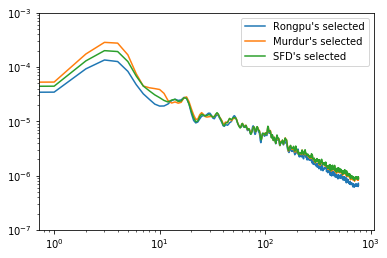

In [10]:
plt.plot(cl_file['cl_gg']['cl'], label="Rongpu's selected")
plt.plot(cl_before_m['cl_gg']['cl'], label="Murdur's selected")
plt.plot(cl_before_s['cl_gg']['cl'], label="SFD's selected")
plt.loglog()
plt.legend()
plt.ylim(1.0e-7, 1.0e-3)

In [13]:
import healpy as hp

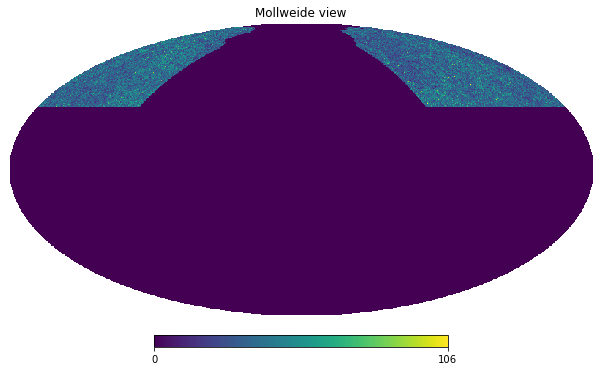

In [14]:
hp.mollview(hd)

In [ ]:
import fitsio as ft

In [ ]:
d = ft.read('/fs/ess/PHS0')